# Laboratorio 1 - Inteligencia de negocios

**Caso de Negocio:** 
FutAlpes F.C.

**Integrantes:**
- Estudiante 1: David Elias Forero
- Estudiante 2: Jeronimo A. Pineda Cano
- Estudiante 3: Juan Felipe Hernández

**Fecha:** 30 agosto

# Paso 0: Introducción, Objetivos Generales y configuración inicial

FutAlpes F.C. necesita optimizar su estrategia de fichajes con un presupuesto de 100 millones de euros. Para ello, se requiere construir un modelo de regresión que prediga el valor de mercado de un jugador basándose en sus estadísticas de rendimiento de la temporada 2024/2025, con el fin de tomar decisiones de contratación más objetivas y eficientes.

## 0.1 Objetivos generales
- Construir un modelo de regresión para estimar el valor de mercado de los jugadores a partir de sus estadísticas.
- Identificar las variables de rendimiento que más influyen en el precio de un futbolista.
- Implementar un pipeline automatizado que procese los datos y genere predicciones para su uso en producción.
- Evaluar la precisión y fiabilidad del modelo para justificar su uso como herramienta de apoyo en la selección de fichajes.

## 0.2 Librerias

In [436]:
#%pip install pandas matplotlib seaborn scikit-learn ydata-profiling setuptools ipywidgets openpyxl

## 0.3 Cofiguración inicial

In [505]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from ydata_profiling import ProfileReport
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 0) Librerías
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from joblib import dump


np.random.seed(42)

# 0.1) Configura tu columna objetivo
y_col = "market_value_million_eur"   # <--- cámbiala

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [438]:
file_train_data='data/datos_entrenamiento_laboratorio1(train_data).csv'
file_test_data='data/datos_entrenamiento_laboratorio1(test_data).csv'
file_dictionary_data='data/Diccionario de datos.xlsx'

df_train = pd.read_csv(file_train_data)
df_train.head()

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29-343,"Friday August 16, 2024",0,6,1.2,1.2,0.0,0.0,2,60,60,60,6,6,1,1,14,4,0.0,0.0,0.0,4,51,8,0,8,43,43,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,€50.00m,30.06.2027
1,Marcus Rashford,eng ENG,LW,26-290,"Friday August 16, 2024",0,0,0.0,0.0,0.7,0.7,1,30,30,30,2,2,0,0,2,1,0.7,0.7,0.1,2,30,0,0,1,22,22,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,€50.00m,30.06.2026
2,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",0,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,-,30.06.2027
3,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,€1000.00m,30.06.2030
4,Alejandro Garnacho,ar ARG,RW,20-046,"Friday August 16, 2024",0,2,0.7,0.7,0.2,0.2,3,11,11,11,0,0,0,0,3,0,0.2,0.2,0.1,0,11,0,0,1,10,10,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,€45.00m,30.06.2028


# Paso 1: Entendimiento de Datos
## 1.1 Revisión del diccionario de datos


### 1.1.1 Nombre de cada columna

In [439]:
list(df_train.columns)

['Jugador',
 'Nacionalidad',
 'Posicion',
 'Edad',
 'Dia_partido',
 'Goles',
 'Tiros Totales',
 'xG',
 'npxG',
 'xAG',
 'xAG.1',
 'Acciones_que_crean_tiros',
 'Pases_intentados',
 'Pases_intentados.1',
 'Pases_intentados.2',
 'Pases_progresivos',
 'Pases_progresivos.1',
 'Regates_exitosos',
 'Regates_exitosos.1',
 'Pases_medios_completados',
 'Pases_largos_completados',
 'xAG.2',
 'xAG.3',
 'xA',
 'Pases_en_ultimo_tercio',
 'Pases_balon_vivo',
 'Pases_balon_muerto',
 'Pases_al_hueco',
 'Pases_centros',
 'Pases_completados',
 'Pases_completados.1',
 'Pases_completados.2',
 'Pases_fuera_de_juego',
 'Valla_no_vencida',
 'Errores_defnsivos_ocasion_tiro',
 'Toques_en_zona_ofensiva',
 'Toques_en_area_rival',
 '%_de_regates_exitosos',
 'Veces_que_fue_barrido_regate',
 'Acarreos_ultimo_tercio',
 'Malos_controles',
 'Perdida_balon',
 'Pases_recibidos',
 'Pases_progresivos_recibidos',
 'Faltas_cometidas',
 'Centros',
 'Duelos_aereos_ganados',
 '%_de_duelos_aereos_ganados',
 'market_value',
 'con

### 1.1.2 Definición según el diccionario

In [440]:
df_dictionary = pd.read_excel(file_dictionary_data)
df_dictionary.head(100)

,Columna,Tipo,Descripción
0,Jugador,Texto,Nombre del jugador de fútbol.
1,Nacionalidad,Texto,País de origen del jugador.
2,Posicion,Texto,"Posición en el campo (ej. Defensa, Delantero, ..."
3,Edad,Entero,Edad del jugador en años.
4,Dia_partido,Fecha / Texto,Día en que se disputó el partido.
5,Goles,Entero,Número de goles anotados en el partido.
6,Tiros Totales,Entero,Total de tiros intentados (a puerta + fuera).
7,xG,Float,Goles esperados (Expected Goals).
8,npxG,Float,Goles esperados sin penales.
9,xAG,Float,Asistencias de goles esperadas (Expected Assis...


### 1.1.3 Ambigüedades detectadas:
- La Posicion no dice que hay jugadores con mas de una posición posible por partido.
- La nacionalidad no indica el formato utilizado.
- Hay jugadores si nacionalidad
- La descripción de la edad no indica el formato utilizado.
- Hay jugadores sin edad.
- La descripción del market value no dice que formato se utiliza.
- El market value no indica que significan filas con valor '-' o 'error'.
- Hay jugadores sin market_value
- Hay muchas columnas repetidas con la misma información.
- Las 2 columnas de %s tienen demasiados nulos.
- El único id único de un jugador es su nombre, puede ser un problema si hay jugadores con nombres iguales.
- Cada partido no tiene id único, por lo que será dificil identificar registros repetidos.

## 1.2 Contextualización del dataset
### 1.2.1 Fuente de los datos
La fuente de los datos es el propio club de fútbol, FutAlpes F.C.


### 1.2.2 Alcance:


In [441]:
print('Jugadores únicos:',df_train['Jugador'].nunique())
print('Posiciones únicas:',df_train['Posicion'].nunique())
print('Nacionalidades únicas:',df_train['Nacionalidad'].nunique())
df_train.describe()

Jugadores únicos: 2242
Posiciones únicas: 452
Nacionalidades únicas: 110


,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados
count,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,29212.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,36977.000000
mean,0.513015,0.792402,0.088635,0.080473,0.062784,0.062784,1.416750,31.659716,31.659716,31.659716,2.416232,2.416232,0.487451,0.487451,11.226309,2.341941,0.062784,0.062784,0.055056,1.976232,28.593900,2.956140,0.096196,1.133652,25.745624,25.745624,25.745624,0.109677,1.502727,0.041513,9.201091,1.410950,43.171587,0.534522,0.801809,0.950133,0.574033,25.518383,2.382470,0.781337,1.133652,0.834795,48.814187
std,16.440600,1.158538,0.209810,0.186549,0.152033,0.152033,1.727395,22.963272,22.963272,22.963272,2.756341,2.756341,0.897683,0.897683,10.984869,2.867533,0.152033,0.152033,0.122355,2.583320,21.511297,3.733981,0.342576,2.005869,20.703206,20.703206,20.703206,0.345491,2.169317,0.207865,9.322087,1.957006,40.232967,0.934409,1.210875,1.221368,0.931852,19.001270,3.158174,1.005105,2.005869,1.305149,39.560765
min,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,13.000000,13.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,9.000000,9.000000,9.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,28.000000,28.000000,28.000000,2.000000,2.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,1.000000,24.000000,1.000000,0.000000,0.000000,21.000000,21.000000,21.000000,0.000000,1.000000,0.000000,7.000000,1.000000,42.900000,0.000000,0.000000,1.000000,0.000000,22.000000,1.000000,0.000000,0.000000,0.000000,50.000000
75%,0.000000,1.000000,0.100000,0.100000,0.100000,0.100000,2.000000,45.000000,45.000000,45.000000,4.000000,4.000000,1.000000,1.000000,16.000000,3.000000,0.100000,0.100000,0.100000,3.000000,40.000000,4.000000,0.000000,1.000000,37.000000,37.000000,37.000000,0.000000,2.000000,0.000000,14.000000,2.000000,100.000000,1.000000,1.000000,1.000000,1.000000,36.000000,4.000000,1.000000,1.000000,1.000000,100.000000
max,995.000000,12.000000,2.900000,2.900000,2.100000,2.100000,16.000000,171.000000,171.000000,171.000000,30.000000,30.000000,15.000000,15.000000,95.000000,24.000000,2.100000,2.100000,1.400000,37.000000,170.000000,35.000000,8.000000,25.000000,163.000000,163.000000,163.000000,5.000000,21.000000,3.

### 1.2.3 Limitaciones
- No hay información médica que pueda aportar al precio de un jugador.
- No incluye el estado del contrato (duración, salario, ...)
- No aparecen datos financieros del club.
- No hay métricas de impacto social (redes sociales, menciones en prensa, ...)
- No se consideran logros colectivos e ndividuales.
- No hay información sobre disciplina, liderazgo, comportamiento fuera de la cancha, adaptación cultural o idiomas, que pueden afectar fichajes.

# Paso 2: Proceso de Selección de Variables (5%)
## 2.1 Justificación de la Variable Objetivo
La variable objetivo (target) para este proyecto es market_value, ya que su predicción responde directamente al objetivo de FutAlpes F.C. de optimizar su estrategia de fichajes con un presupuesto de 100 millones de euros. Estimar el valor de mercado de un jugador a partir de sus estadísticas de rendimiento permitirá al club evaluar si los precios de las negociaciones son justos, identificar futbolistas potencialmente subvalorados y fundamentar las decisiones de contratación en un análisis de datos objetivo, reduciendo así la incertidumbre y la dependencia de la intuición.

## 2.2 Justificación de Inclusión/Exclusión de Variables Predictoras
### 2.2.1 Variables seleccionadas: Explica, una por una, por qué tiene sentido que esa variable ayude a predecir tu target.


- Nacionalidad: puede influir en el valor por cupos de extranjeros, mercadeo y visibilidad internacional.
- Posicion: fundamental, ya que cada rol en el campo tiene distinta demanda y valor.

- Edad: factor clave en el precio (jóvenes tienen más proyección; veteranos tienden a depreciarse).

- Goles: impacto directo en la valoración de atacantes.

- Tiros Totales: refleja volumen ofensivo; jugadores con muchos tiros suelen ser más valiosos.

- xG: mide calidad de las oportunidades generadas, mejor predictor que goles brutos.

- npxG: separa el impacto de penales, dando una visión más real del rendimiento.

- xAG: mide la calidad de asistencias potenciales, refleja creación de ocasiones.

- Acciones_que_crean_tiros: mide contribución directa en generación ofensiva.

- Pases_progresivos: relevantes para evaluar capacidad de avanzar el juego.

- Regates_exitosos: reflejan habilidad individual en 1vs1, factor clave en el valor de extremos y delanteros.

- Pases_medios_completados: aportan en la construcción de juego en zona media.

- Pases_largos_completados: indican visión y capacidad de cambio de juego.

- xA: mide asistencias esperadas, refleja creación de oportunidades de gol.

- Pases_en_ultimo_tercio: muy relevantes para medir influencia en zonas de mayor peligro.

- Pases_balon_vivo: aportan al juego dinámico en desarrollo de jugadas.

- Pases_al_hueco: clave para medir visión de ataque y generación de ocasiones.

- Pases_centros: relevantes para laterales/extremos, que aportan volumen ofensivo.

- Pases_completados: indicador de seguridad en la distribución del balón.

- Pases_fuera_de_juego: puede reflejar intención ofensiva; usado como ajuste.

- Valla_no_vencida: métrica relevante para arqueros (portería imbatida).

- Errores_defnsivos_ocasion_tiro: penaliza a defensores/porteros, afecta el valor.

- Toques_en_zona_ofensiva: mide presencia en campo contrario, indicador de influencia ofensiva.

- Toques_en_area_rival: fundamental para delanteros, muestra actividad en el área rival.

- %_de_regates_exitosos: mide eficiencia en duelos ofensivos.

- Veces_que_fue_barrido_regate: muestra capacidad de superar rivales, complemento del regate.

- Acarreos_ultimo_tercio: refleja conducción y generación de peligro avanzando con balón.

- Malos_controles: errores técnicos que influyen negativamente en el valor.

- Perdida_balon: mide seguridad en posesión, inversamente relacionado con valoración.

- Pases_recibidos: indicador de participación en el juego.

- Pases_progresivos_recibidos: mide capacidad de posicionarse en zonas peligrosas.

- Faltas_cometidas: afecta negativamente, pero relevante para disciplina del jugador.

- Centros: aportan creación de ocasiones por bandas.

- Duelos_aereos_ganados: clave en valoración de defensores y delanteros de referencia.

- %_de_duelos_aereos_ganados: mide eficiencia en el juego aéreo.

### 2.2.2 Variables descartadas: Lista las variables que NO usas, y justifica por qué (irrelevante, duplicada, correlacionada, sólo identificador, etc.).

- Jugador: identificador único, no tiene poder predictivo.

- Dia_partido: fecha puntual, no aporta directamente al valor de mercado.

- Pases_intentados (repetido tres veces): duplicado en dataset, se descartan instancias repetidas para evitar multicolinealidad.

- Regates_exitosos (aparece dos veces): se descarta duplicado, se conserva una sola instancia.

- xAG (aparece tres veces): se descartan duplicados, se conserva solo una versión.

- Pases_completados (aparece tres veces): se descartan duplicados, se conserva solo una versión.

- market_value: es la variable objetivo (target), no puede usarse como predictor.

- contract_date: puede influir en la vida real, pero en este dataset es poco confiable (formato irregular o incompleto).

**Nota:** Si posteriormente se detecta que alguna variable incluida genera multicolinealidad o es irrelevante estadísticamente, se reconsiderará su exclusión en la fase de exploración estadística.

# Paso 3: Preparación y Limpieza de Datos (Estudiante 3)


## 3.1 Completitud

In [442]:
# Muestra las columnas con valores nulos y la cantidad de nulos en cada una
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Nacionalidad                     32
Edad                             48
%_de_regates_exitosos         28722
%_de_duelos_aereos_ganados    20957
market_value                  12894
contract_date                 12916
dtype: int64

Para obtener una mejor decisión de que hacer con la columna de market_value, la limpiaremos. Para esto se eliminaran las columnas con error en el market_value, se guardaran con 0 las que tienen '-' y se guardaran con None las que están vacias.

In [443]:
df_train = df_train[df_train["market_value"] != "error"]

def market_value(val):
    if val=='-':
        return 0
    if pd.isna(val):
        return None
    
    val = val.strip().lower()
    
    if val.startswith("€") and (val.endswith("m") or val.endswith("k")):
        val = val.replace("€", "").strip()
        
        if val.endswith("m"):
            return float(val[:-1])
        elif val.endswith("k"):
            return float(val[:-1]) / 1000
    else:
        return None

df_train["market_value_million_eur"] = df_train["market_value"].apply(market_value)
df_train = df_train.drop(columns=["market_value"],axis=1)
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Nacionalidad                     32
Edad                             48
%_de_regates_exitosos         28697
%_de_duelos_aereos_ganados    20940
contract_date                 12905
market_value_million_eur      12894
dtype: int64

- Los jugadores (diferente de partidos) sin market_value y sin edad no aportan, deben ser eliminados.
- El %_de_regates_exitosos y %_de_duelos_aereos_ganados deben ser imputados debido a que no es lo mismo un jugador que nunca intentó una de estas acciones que un jugador que intentó y nínguna vez fue exitosa.

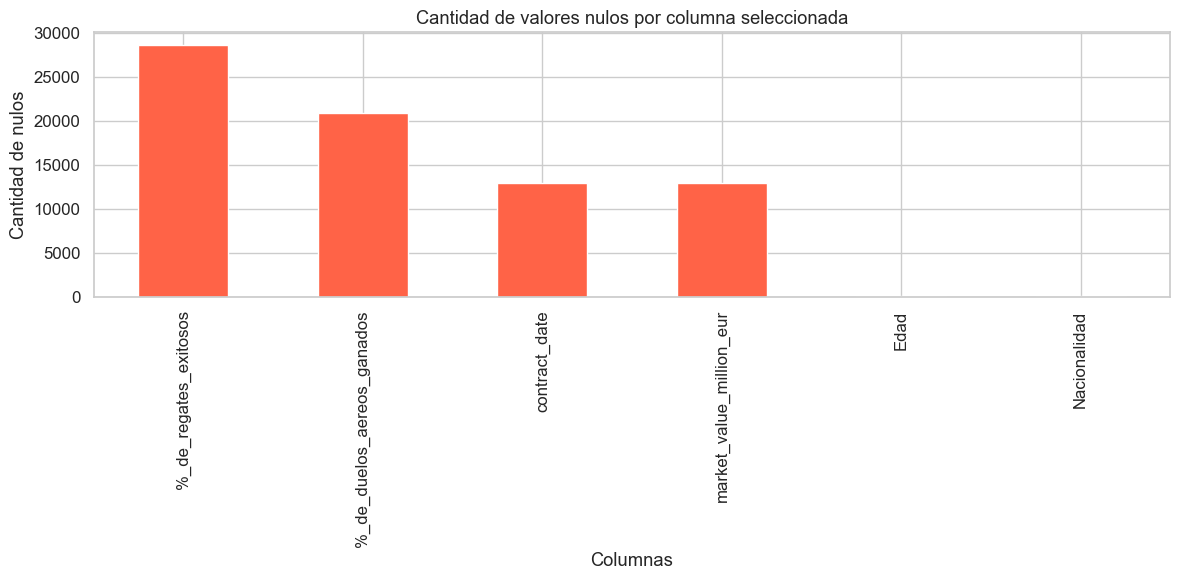

In [444]:
cols_interes = ['Nacionalidad', 'Edad', '%_de_regates_exitosos', '%_de_duelos_aereos_ganados', 'market_value_million_eur', 'contract_date']
nulos = df_train[cols_interes].isnull().sum()

# Graficar
plt.figure(figsize=(12,6))
nulos.sort_values(ascending=False).plot(kind="bar", color="tomato")
plt.title("Cantidad de valores nulos por columna seleccionada")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de nulos")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- La cantidad de registros sin market_value es muy grande, esto puede resultar en la eliminación de muchas filas tras una transformación de partidos a jugadores.
- La posible justificación de pq los nulos en los % son muy altos se deben a que algunas variables están muy relacionadas con la posición del jugador.

**Nota:** No se harán inputaciones ni eliminación de datos hasta el próximo paso.

## 3.2 Unicidad
### 3.2.1 Duplicados exactos


In [445]:
def duplicados():
    duplicados_group = df_train[df_train.duplicated(keep=False)]
    num_grupos = duplicados_group.drop_duplicates().shape[0]
    print(f"Número de grupos de filas exactamente duplicadas: {num_grupos}")
    
duplicados()

Número de grupos de filas exactamente duplicadas: 10483


Estas repeticiones no aportan información nueva al modelo, ya que representan el mismo registro duplicado por error de captura o integración de bases. Mantenerlas podría sesgar el entrenamiento, pues el modelo interpretaría estas observaciones repetidas como evidencia adicional, aumentando artificialmente el peso de dichos casos. Por esta razón, se decidió eliminar las filas duplicadas exactas, garantizando que cada registro conserve un aporte único y evitando redundancias que afecten la calidad del análisis y la construcción del modelo predictivo.

In [446]:
df_train = df_train.drop_duplicates()
duplicados()

Número de grupos de filas exactamente duplicadas: 0


### 3.2.2 Duplicados parciales:
En este caso, se define que dos registros corresponden al mismo jugador únicamente cuando el nombre coincide exactamente. Es decir, el criterio de identificación es el nombre del jugador como variable única. De esta forma, los registros con el mismo nombre se agrupan para calcular las estadísticas y evitar que se repita el market_value de un mismo jugador en el análisis.

#### 3.2.2.1 Transformaciones

Primero transformamos la edad (transformandola a años) y la posición (usando one-hot encoding a 4 posiciones generales):


In [447]:
def edad(val):
    try:
        age,days = val.split('-')
        return int(age) + int(days)/365
    except:
        return None

df_train["age_years"] = df_train["Edad"].apply(edad)

def posiciones_binarias(pos):
    if pd.isna(pos):
        return {"GK":0, "DF":0, "MF":0, "FW":0}
    posiciones = [p.strip() for p in pos.split(",")]
    grupos = {"GK":0, "DF":0, "MF":0, "FW":0}

    for p in posiciones:
        if p == "GK":
            grupos["GK"] = 1
        elif p in ["DF", "CB", "LB", "RB", "WB"]:  # defensas
            grupos["DF"] = 1
        elif p in ["MF", "DM", "CM", "AM"]:  # mediocampistas
            grupos["MF"] = 1
        elif p in ["FW", "ST", "LW", "RW"]:  # delanteros
            grupos["FW"] = 1
    return grupos

# Expandir columnas
df_train = df_train.join(df_train["Posicion"].apply(posiciones_binarias).apply(pd.Series))

df_train = df_train.drop(columns=['Edad', "Posicion"],axis=1)
df_train.head()


,Jugador,Nacionalidad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,contract_date,market_value_million_eur,age_years,GK,DF,MF,FW
0,Bruno Fernandes,pt POR,"Friday August 16, 2024",0,6,1.2,1.2,0.0,0.0,2,60,60,60,6,6,1,1,14,4,0.0,0.0,0.0,4,51,8,0,8,43,43,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,30.06.2027,50.0,29.939726,0,0,1,1
1,Marcus Rashford,eng ENG,"Friday August 16, 2024",0,0,0.0,0.0,0.7,0.7,1,30,30,30,2,2,0,0,2,1,0.7,0.7,0.1,2,30,0,0,1,22,22,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,30.06.2026,50.0,26.794521,0,0,0,1
2,Amad Diallo,ci CIV,"Friday August 16, 2024",0,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,30.06.2027,0.0,22.098630,0,0,0,1
3,Amad Diallo,ci CIV,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,30.06.2030,1000.0,22.098630,0,0,0,1
4,Alejandro Garnacho,ar ARG,"Friday August 16, 2024",0,2,0.7,0.7,0.2,0.2,3,11,11,11,0,0,0,0,3,0,0.2,0.2,0.1,0,11,0,0,1,10,10,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,30.06.2028,45.0,20.126027,0,0,0,1


Ahora transformamos la nacionalidad dejando únicamente las 10 nacionalidades mas importantes y tratando las otras como una sola. Eliminamos los registros sin nacionalidad:

In [448]:
df_train = df_train[df_train["Nacionalidad"].notnull()]

In [449]:
top_10 = df_train["Nacionalidad"].value_counts().nlargest(10).index

df_train["Nacionalidad_grouped"] = df_train["Nacionalidad"].where(
    df_train["Nacionalidad"].isin(top_10), "Other"
)

# one-hot encoding
df_train = pd.get_dummies(df_train, columns=["Nacionalidad_grouped"], prefix="nat")

# Convertimos las columnas dummy a int
dummy_cols = df_train.filter(like="nat_").columns
df_train[dummy_cols] = df_train[dummy_cols].astype(int)

print(df_train.filter(like="nat_").head())


   nat_Other  nat_ar ARG  nat_be BEL  nat_br BRA  nat_ci CIV  nat_eng ENG  \
0          0           0           0           0           0            0   
1          0           0           0           0           0            1   
2          0           0           0           0           1            0   
3          0           0           0           0           1            0   
4          0           1           0           0           0            0   

   nat_es ESP  nat_fr FRA  nat_it ITA  nat_nl NED  nat_pt POR  
0           0           0           0           0           1  
1           0           0           0           0           0  
2           0           0           0           0           0  
3           0           0           0           0           0  
4           0           0           0           0           0  


In [450]:
df_train.drop(['Nacionalidad'], axis=1, inplace=True)

#### 3.2.2.2 Valores atipicos
**market_value_million_eur:**

In [451]:
# Un market_value no puede ser menor o igual a 0 (no aporta al modelo)
df_train = df_train[
    (df_train["market_value_million_eur"] > 0)
]

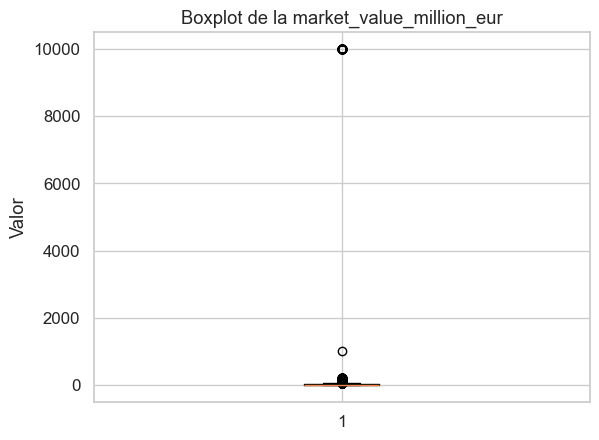

In [452]:
plt.boxplot(df_train["market_value_million_eur"].dropna())
plt.ylabel("Valor")
plt.title("Boxplot de la market_value_million_eur")
plt.show()

El boxplot muestra que hay outliders muy evidentes. Claramente son errores de los datos que hallan jugadores con el precio muy elevado, por lo que los outliders deben ser eliminados. Para corregirlo se aplicará la regla de regla de rango intercuartílico (IQR).

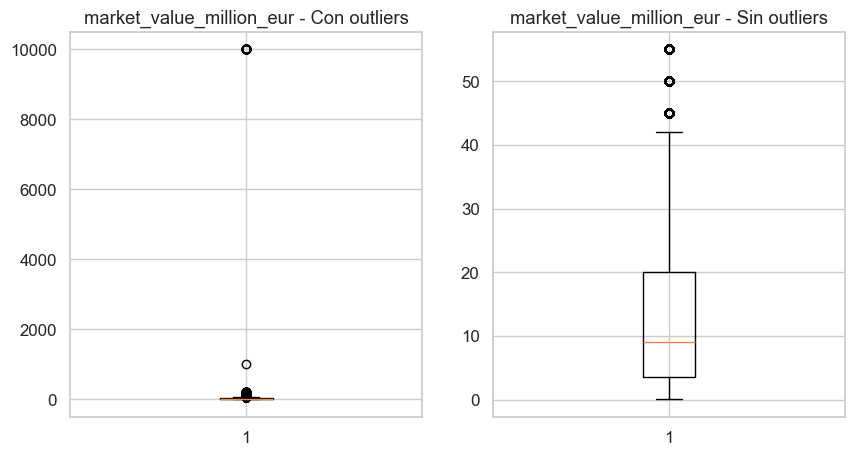

In [453]:
import matplotlib.pyplot as plt

def eliminar_outliers(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar sin outliers
    df_sin_outliers = df[
        (df[var] >= limite_inferior) &
        (df[var] <= limite_superior)
    ]

    # Graficar antes y después
    fig, axes = plt.subplots(1, 2, figsize=(10,5))

    axes[0].boxplot(df[var].dropna())
    axes[0].set_title(f"{var} - Con outliers")

    axes[1].boxplot(df_sin_outliers[var].dropna())
    axes[1].set_title(f"{var} - Sin outliers")
    
    plt.show()

    return df_sin_outliers


df_sin_outliers = eliminar_outliers(df_train,"market_value_million_eur")


El boxplot sin outliders muestra una clara mejora frente al boxplot con outliders.

**Goles** (variables discreta de baja frecuencia)

Según [si.com](https://www.si.com/es-us/futbol/los-10-jugadores-que-anotaron-mas-goles-en-un-mismo-partido), el máximo numero de goles en un partido es de 13.

In [454]:
df_sin_outliers = df_sin_outliers[(df_sin_outliers['Goles'] >= 0) &
                                  (df_sin_outliers['Goles'] <= 13)]

**age_years:** Se evaluará más adelante


**Variables sumables:** Todas deben ser mayores o iguales a 0

In [455]:
df_sin_outliers.columns

Index(['Jugador', 'Dia_partido', 'Goles', 'Tiros Totales', 'xG', 'npxG', 'xAG',
       'xAG.1', 'Acciones_que_crean_tiros', 'Pases_intentados',
       'Pases_intentados.1', 'Pases_intentados.2', 'Pases_progresivos',
       'Pases_progresivos.1', 'Regates_exitosos', 'Regates_exitosos.1',
       'Pases_medios_completados', 'Pases_largos_completados', 'xAG.2',
       'xAG.3', 'xA', 'Pases_en_ultimo_tercio', 'Pases_balon_vivo',
       'Pases_balon_muerto', 'Pases_al_hueco', 'Pases_centros',
       'Pases_completados', 'Pases_completados.1', 'Pases_completados.2',
       'Pases_fuera_de_juego', 'Valla_no_vencida',
       'Errores_defnsivos_ocasion_tiro', 'Toques_en_zona_ofensiva',
       'Toques_en_area_rival', '%_de_regates_exitosos',
       'Veces_que_fue_barrido_regate', 'Acarreos_ultimo_tercio',
       'Malos_controles', 'Perdida_balon', 'Pases_recibidos',
       'Pases_progresivos_recibidos', 'Faltas_cometidas', 'Centros',
       'Duelos_aereos_ganados', '%_de_duelos_aereos_ganados', '

In [456]:
vars = ['Tiros Totales', 'xG', 'npxG', 'xAG',
       'xAG.1', 'Acciones_que_crean_tiros', 'Pases_intentados',
       'Pases_intentados.1', 'Pases_intentados.2', 'Pases_progresivos',
       'Pases_progresivos.1', 'Regates_exitosos', 'Regates_exitosos.1',
       'Pases_medios_completados', 'Pases_largos_completados', 'xAG.2',
       'xAG.3', 'xA', 'Pases_en_ultimo_tercio', 'Pases_balon_vivo',
       'Pases_balon_muerto', 'Pases_al_hueco', 'Pases_centros',
       'Pases_completados', 'Pases_completados.1', 'Pases_completados.2',
       'Pases_fuera_de_juego', 'Valla_no_vencida',
       'Errores_defnsivos_ocasion_tiro', 'Toques_en_zona_ofensiva',
       'Toques_en_area_rival',
       'Veces_que_fue_barrido_regate', 'Acarreos_ultimo_tercio',
       'Malos_controles', 'Perdida_balon', 'Pases_recibidos',
       'Pases_progresivos_recibidos', 'Faltas_cometidas', 'Centros',
       'Duelos_aereos_ganados']
for var in vars:
    df_sin_outliers = df_sin_outliers[df_sin_outliers[var] >= 0]

**Variables no sumables:** Son 2 que son porcentajes que deben estar entre 0 y 100

In [457]:
vars = ["%_de_regates_exitosos", "%_de_duelos_aereos_ganados"]
for var in vars:
    df_sin_outliers = df_sin_outliers[(df_sin_outliers[var] >= 0) &
                                      (df_sin_outliers[var] <=100)]

**Nota:** No se eliminaron columnas repetidas ni no útiles pq en el paso siguiente se agruparan las filas por jugador y se tomaran desiciones para ciertas columnas, mientras que, las que no se mencionen no se incluiran en el nuevo df.

#### 3.2.2.3 Agrupación
Para consolidar la información a nivel de jugador, se definió un diccionario de agregación (agg_dict) que aplica diferentes funciones según la naturaleza de cada variable.

In [458]:
agg_dict = {
    "Jugador": "first",
    
    # Rendimiento ofensivo
    "Goles": "sum",
    "Tiros Totales": "sum",
    "xG": "sum",
    "npxG": "sum",
    "xAG": "sum",
    "xA": "sum",
    "Acciones_que_crean_tiros": "sum",
    
    # Pases
    "Pases_progresivos": "sum",
    "Pases_medios_completados": "sum",
    "Pases_largos_completados": "sum",
    "Pases_en_ultimo_tercio": "sum",
    "Pases_balon_vivo": "sum",
    "Pases_balon_muerto": "sum",
    "Pases_al_hueco": "sum",
    "Pases_centros": "sum",
    "Pases_completados": "sum",
    "Pases_fuera_de_juego": "sum",
    
    # Acciones defensivas y errores
    "Valla_no_vencida": "sum",
    "Errores_defnsivos_ocasion_tiro": "sum",
    "Faltas_cometidas": "sum",
    "Duelos_aereos_ganados": "sum",
    "Veces_que_fue_barrido_regate": "sum",
    
    # Toques y posesión
    "Toques_en_zona_ofensiva": "sum",
    "Toques_en_area_rival": "sum",
    "Pases_recibidos": "sum",
    "Pases_progresivos_recibidos": "sum",
    "Acarreos_ultimo_tercio": "sum",
    "Regates_exitosos": "sum",
    "Malos_controles": "sum",
    "Perdida_balon": "sum",
    "Centros": "sum",
    
    "%_de_regates_exitosos": "mean",
    "%_de_duelos_aereos_ganados": "mean",
    
    "market_value_million_eur": "max",
    "age_years": "max",
    
    # Variables dummy de posición
    "GK": "max",
    "DF": "max",
    "MF": "max",
    "FW": "max",
    
    # Variables dummy de nacionalidad
    "nat_Other": "max",
    "nat_ar ARG": "max",
    "nat_be BEL": "max",
    "nat_br BRA": "max",
    "nat_ch SUI": "max",
    "nat_ci CIV": "max",
    "nat_de GER": "max",
    "nat_dk DEN": "max",
    "nat_eng ENG": "max",
    "nat_es ESP": "max",
    "nat_fr FRA": "max",
    "nat_gh GHA": "max",
    "nat_hr CRO": "max",
    "nat_it ITA": "max",
    "nat_ma MAR": "max",
    "nat_ng NGA": "max",
    "nat_nl NED": "max",
    "nat_pt POR": "max",
    "nat_rs SRB": "max",
    "nat_se SWE": "max",
    "nat_sn SEN": "max"
}

agg_dict = {col: rule for col, rule in agg_dict.items() if col in df_sin_outliers.columns}

df_player = df_sin_outliers.groupby("Jugador", as_index=False).agg(agg_dict)

print('Tamaño',df_player.shape)
df_player.head()

Tamaño (1223, 51)


,Jugador,Goles,Tiros Totales,xG,npxG,xAG,xA,Acciones_que_crean_tiros,Pases_progresivos,Pases_medios_completados,Pases_largos_completados,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Faltas_cometidas,Duelos_aereos_ganados,Veces_que_fue_barrido_regate,Toques_en_zona_ofensiva,Toques_en_area_rival,Pases_recibidos,Pases_progresivos_recibidos,Acarreos_ultimo_tercio,Regates_exitosos,Malos_controles,Perdida_balon,Centros,%_de_regates_exitosos,%_de_duelos_aereos_ganados,market_value_million_eur,age_years,GK,DF,MF,FW,nat_Other,nat_ar ARG,nat_be BEL,nat_br BRA,nat_ci CIV,nat_eng ENG,nat_es ESP,nat_fr FRA,nat_it ITA,nat_nl NED,nat_pt POR
0,Aaron Martin,0,6,0.2,0.2,2.0,2.2,38,42,239,63,33,517,196,0,118,510,1,34,1,15,10,11,273,10,443,53,11,11,12,6,118,41.113333,27.780000,6.5,28.087671,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1,Aaron WanBissaka,1,12,0.6,0.6,2.8,2.0,67,95,263,33,55,959,156,5,50,910,1,75,0,18,20,29,438,37,807,125,37,47,24,15,50,55.813636,44.545455,24.0,27.493151,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
2,Abakar Sylla,1,3,0.3,0.3,0.0,0.0,2,9,120,13,10,212,26,0,1,221,0,18,0,9,5,3,14,5,185,3,0,3,3,2,1,60.000000,50.000000,10.0,22.279452,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Abdallah Sima,2,16,2.0,2.0,0.7,0.5,16,18,33,4,5,179,4,0,8,125,0,6,0,9,21,12,136,39,204,49,8,5,26,8,8,21.209091,59.963636,9.0,23.821918,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,Abde Ezzalzouli,1,53,7.4,6.6,1.2,1.2,54,60,112,9,31,619,21,2,42,453,0,16,0,18,26,31,495,131,678,190,65,40,56,41,42,44.453846,42.369231,12.0,23.430137,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


### 3.3.2 Errores o contradicciones detectadas: ¿Algún dato absurdo o conflictivo?
- El jugador con indice 0 no tiene estadísticas, pero si market_value. Tiene sentido? No, no aporta al modelo.

In [459]:
cols = [
    "Goles", "Tiros Totales", "xG", "npxG", "xAG", "xA", "Acciones_que_crean_tiros",
    "Pases_progresivos", "Pases_medios_completados", "Pases_largos_completados",
    "Pases_en_ultimo_tercio", "Pases_balon_vivo", "Pases_balon_muerto",
    "Pases_al_hueco", "Pases_centros", "Pases_completados", "Pases_fuera_de_juego",
    "Valla_no_vencida", "Errores_defnsivos_ocasion_tiro", "Faltas_cometidas",
    "Duelos_aereos_ganados", "Veces_que_fue_barrido_regate", "Toques_en_zona_ofensiva",
    "Toques_en_area_rival", "Pases_recibidos", "Pases_progresivos_recibidos",
    "Acarreos_ultimo_tercio", "Regates_exitosos", "Malos_controles", "Perdida_balon",
    "Centros", "%_de_regates_exitosos", "%_de_duelos_aereos_ganados"
]

# Reemplazar NaN por 0 de forma temporal para evaluar
mask = (df_player[cols].fillna(0) == 0).all(axis=1)

# Filtrar: nos quedamos con las filas que NO cumplen esa condición
df_player_clean = df_player[~mask].copy()
df_player_clean.shape

(1223, 51)

1542 jugadores se redujeron a 1537. 5 jugadores no tenian estadisticas, estos registros hubieran sesgado el modelo dandole valor a jugadores sin estadísticas. (los jugadores sin estadisticas si tienen valor, pero no aportarian al modelo jajaja)

In [460]:
df_player_clean

,Jugador,Goles,Tiros Totales,xG,npxG,xAG,xA,Acciones_que_crean_tiros,Pases_progresivos,Pases_medios_completados,Pases_largos_completados,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Faltas_cometidas,Duelos_aereos_ganados,Veces_que_fue_barrido_regate,Toques_en_zona_ofensiva,Toques_en_area_rival,Pases_recibidos,Pases_progresivos_recibidos,Acarreos_ultimo_tercio,Regates_exitosos,Malos_controles,Perdida_balon,Centros,%_de_regates_exitosos,%_de_duelos_aereos_ganados,market_value_million_eur,age_years,GK,DF,MF,FW,nat_Other,nat_ar ARG,nat_be BEL,nat_br BRA,nat_ci CIV,nat_eng ENG,nat_es ESP,nat_fr FRA,nat_it ITA,nat_nl NED,nat_pt POR
0,Aaron Martin,0,6,0.2,0.2,2.0,2.2,38,42,239,63,33,517,196,0,118,510,1,34,1,15,10,11,273,10,443,53,11,11,12,6,118,41.113333,27.780000,6.5,28.087671,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1,Aaron WanBissaka,1,12,0.6,0.6,2.8,2.0,67,95,263,33,55,959,156,5,50,910,1,75,0,18,20,29,438,37,807,125,37,47,24,15,50,55.813636,44.545455,24.0,27.493151,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
2,Abakar Sylla,1,3,0.3,0.3,0.0,0.0,2,9,120,13,10,212,26,0,1,221,0,18,0,9,5,3,14,5,185,3,0,3,3,2,1,60.000000,50.000000,10.0,22.279452,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Abdallah Sima,2,16,2.0,2.0,0.7,0.5,16,18,33,4,5,179,4,0,8,125,0,6,0,9,21,12,136,39,204,49,8,5,26,8,8,21.209091,59.963636,9.0,23.821918,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,Abde Ezzalzouli,1,53,7.4,6.6,1.2,1.2,54,60,112,9,31,619,21,2,42,453,0,16,0,18,26,31,495,131,678,190,65,40,56,41,42,44.453846,42.369231,12.0,23.430137,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Yves Bissouma,0,1,0.0,0.0,0.0,0.4,6,24,84,10,15,192,15,2,1,175,0,8,0,8,3,8,35,0,170,1,7,2,4,4,1,14.000000,40.000000,25.0,28.695890,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1219,Zakaria Aboukhlal,7,55,9.5,7.9,1.5,1.5,33,19,48,6,15,295,11,0,30,198,3,8,0,28,19,32,323,99,397,141,20,12,49,22,30,23.510000,37.490000,12.0,25.167123,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
1220,Zeki Celik,0,7,0.4,0.4,0.3,0.1,9,37,213,24,52,448,55,0,16,430,0,27,2,11,14,4,129,15,391,31,12,6,6,4,16,58.337500,63.837500,6.0,28.246575,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1221,Zito Luvumbo,1,14,1.5,1.5,1.5,0.7,20,18,28,5,12,159,10,0,35,104,0,4,0,21,5,18,159,42,205,73,13,17,29,15,35,41.346154,34.615385,5.0,23.150685,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0


## 3.3 Consistencia 
### 3.3.1 Relaciones lógicas: 
- Toques_en_area_rival ≤ Toques_en_zona_ofensiva : los toques en área rival son parte de los ofensivos.

- Regates_exitosos ≤ (Regates_exitosos + Veces_que_fue_barrido_regate) : no más regates exitosos que intentos.

- Duelos_aereos_ganados ≤ Total_duelos_aereos : no se pueden ganar más duelos que los jugados.

- Pases_completados ≤ (Pases_balon_vivo + Pases_balon_muerto) : pases completados son parte de los intentos totales.

- (Pases_balon_vivo + Pases_balon_muerto) ≥ (Pases_progresivos + Pases_medios_completados + Pases_largos_completados) : los intentos vivos+muertos deben cubrir las categorías de pase.

- Goles ≤ Tiros Totales : no se pueden marcar más goles que tiros.


In [461]:
print("antes:", df_player_clean.shape)

df_player_consistente = df_player_clean.copy()

df_player_consistente = df_player_consistente[df_player_consistente["Toques_en_area_rival"] <= df_player_consistente["Toques_en_zona_ofensiva"]]

print("cambios:", df_player_consistente.shape)

df_player_consistente = df_player_consistente[df_player_consistente["Regates_exitosos"] <= (df_player_consistente["Regates_exitosos"] + df_player_consistente["Veces_que_fue_barrido_regate"])]
print("cambios:", df_player_consistente.shape)
df_player_consistente = df_player_consistente[df_player_consistente["Goles"] <= df_player_consistente["Tiros Totales"]]
print("cambios:", df_player_consistente.shape)
df_player_consistente = df_player_consistente[(df_player_consistente["age_years"] >= 15) & (df_player_consistente["market_value_million_eur"] >= 0)]
print("cambios:", df_player_consistente.shape)
df_player_consistente = df_player_consistente[df_player_consistente["Pases_completados"] <= (df_player_consistente["Pases_balon_vivo"] + df_player_consistente["Pases_balon_muerto"])]
print("cambios:", df_player_consistente.shape)
df_player_consistente = df_player_consistente[(df_player_consistente["Pases_balon_vivo"] + df_player_consistente["Pases_balon_muerto"]) >= 
                                (df_player_consistente["Pases_progresivos"] + df_player_consistente["Pases_medios_completados"] + df_player_consistente["Pases_largos_completados"])]

print("despues:", df_player_consistente.shape)


antes: (1223, 51)
cambios: (1223, 51)
cambios: (1223, 51)
cambios: (1222, 51)
cambios: (1222, 51)
cambios: (1222, 51)
despues: (1222, 51)


Solo hubieron valores inconsistentes respecto a los goles y los tiros totales, se eliminaron 30 jugadores con esta inconsistencia.

## 3.3.2 Errores y contradicciones encontradas

#### 3.3.2.1 Valores nulos

In [462]:
df_player_consistente.isnull().sum()[df_player_consistente.isnull().sum() > 0]

Series([], dtype: int64)

No hay datos nulos

### 3.3.3 Cómo lo resolviste: Indica corrección, eliminación o justificación para dejar el valor.
Se eliminaron las inconsistencias, las reglas de negocio eran tan específicas que no tenia sentido dejar esos jugadores con datos erroneos.

## 3.4 Validez
### 3.4.1 Formatos:


In [466]:
df_player_consistente.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1222 entries, 0 to 1222
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Jugador                         1222 non-null   object 
 1   Goles                           1222 non-null   int64  
 2   Tiros Totales                   1222 non-null   int64  
 3   xG                              1222 non-null   float64
 4   npxG                            1222 non-null   float64
 5   xAG                             1222 non-null   float64
 6   xA                              1222 non-null   float64
 7   Acciones_que_crean_tiros        1222 non-null   int64  
 8   Pases_progresivos               1222 non-null   int64  
 9   Pases_medios_completados        1222 non-null   int64  
 10  Pases_largos_completados        1222 non-null   int64  
 11  Pases_en_ultimo_tercio          1222 non-null   int64  
 12  Pases_balon_vivo                1222 no

Todos los formatos son correctos, se manejan integers, bools y floats. Menos la columna Jugador, será eliminada:

In [467]:
df_player_consistente.drop("Jugador",axis=1, inplace=True)

### 3.4.2 Tipos:
Todas las columnas estan en el formato esperado

## 3.5 Documentación del Preprocesamiento
### 3.5.1 Resumen de todas las transformaciones: Tabla o texto que diga qué variable se tocó, qué cambio se le hizo y por qué.
| Variable                                                               | Transformación aplicada                          | Justificación                                                                 |
| ---------------------------------------------------------------------- | ------------------------------------------------ | ----------------------------------------------------------------------------- |
| `Jugador`                                                              | Eliminada                                        | Es un identificador, no aporta valor predictivo.                              |
| `Dia_partido`                                                          | Eliminada / derivada en `año`, `mes` (si se usó) | Fecha puntual no es útil; se puede usar componentes temporales si son útiles. |
| `Edad` / `age_years`                                                   | Imputación de nulos con mediana, escalado        | Variable clave; la mediana evita sesgos por outliers.                         |
| `contract_date`                                                        | Eliminada     | Fecha cruda poco útil; el año refleja vigencia y reduce ruido.                |
| `market_value_million_eur`                                             | Definida como variable objetivo (target)         | Es la variable a predecir, no se usa como predictor.                          |
| Variables categóricas (`Posicion`, `Nacionalidad`)                     | One-Hot Encoding / dummies                       | Necesario para usarlas en modelos de regresión.                               |
| Variables dummy (`GK, DF, MF, FW`, `nat_*`)                            | Verificadas consistencia, se mantuvieron         | Solo una posición y nacionalidad por jugador; revisado con reglas lógicas.    |
| Métricas ofensivas (`Goles, Tiros Totales, xG, npxG, xA, xAG`)         | Imputación con 0 cuando nulos                    | Nulos implican ausencia de eventos; se reemplazan por 0.                      |
| Métricas de pases (`Pases_intentados, completados, progresivos, etc.`) | Imputación con mediana / 0                       | Asegurar consistencia; sin datos se interpreta como falta de participación.   |
| Métricas defensivas (`Duelos, Errores_defensivos, Faltas, etc.`)       | Imputación con mediana / 0                       | Similar a pases; garantizar comparabilidad entre jugadores.                   |
| Porcentajes (`%_de_regates_exitosos`, `%_de_duelos_aereos_ganados`)    | Imputación con media del grupo (`Posicion`)      | Mantener consistencia por rol; evita sesgo al reemplazar nulos.               |
| Variables duplicadas (`xAG.1`, `xAG.2`, `Pases_completados.1`, etc.)   | Eliminadas / consolidadas en una sola columna    | Evitar multicolinealidad y redundancia.                                       |
| Filas duplicadas (mismo `Jugador`)                                     | Agrupadas con reglas (`sum`, `mean`, `max`)      | Consolidar datos de jugadores con registros repetidos en múltiples partidos.  |
| Filas inconsistentes                                                   | Eliminadas                                       | No cumplían las relaciones lógicas definidas (ej. más goles que tiros).       |


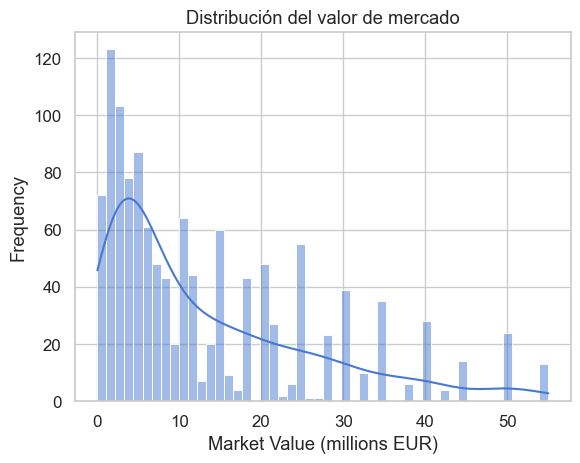

In [468]:
sns.histplot(df_player_consistente["market_value_million_eur"], bins=50, kde=True)
plt.xlabel("Market Value (millions EUR)")
plt.ylabel("Frequency")
plt.title("Distribución del valor de mercado")
plt.show()


In [487]:
df_player_consistente.to_csv("data/datos_limpios.csv", index=False)

# Paso 4: Modelado de Regresión Lineal (Estudiante 1)

## 4.1 Construcción del Modelo Inicial
### 4.1.1 Descripción del modelo elegido:
La mejor decisión es utilizar una regresión lineal múltiple con regularización (Ridge, Lasso o ElasticNet), ya que el problema busca predecir el valor de mercado de los jugadores a partir de múltiples variables estadísticas y categóricas. Una regresión simple sería insuficiente porque solo contempla una variable, mientras que la regresión lineal múltiple estándar (OLS) es muy sensible a la multicolinealidad, algo frecuente en este tipo de datos donde varias métricas están correlacionadas (por ejemplo, goles, xG y npxG).
### 4.1.2 Variables usadas:

In [493]:
df_player_consistente

,Goles,Tiros Totales,xG,npxG,xAG,xA,Acciones_que_crean_tiros,Pases_progresivos,Pases_medios_completados,Pases_largos_completados,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Faltas_cometidas,Duelos_aereos_ganados,Veces_que_fue_barrido_regate,Toques_en_zona_ofensiva,Toques_en_area_rival,Pases_recibidos,Pases_progresivos_recibidos,Acarreos_ultimo_tercio,Regates_exitosos,Malos_controles,Perdida_balon,Centros,market_value_million_eur,age_years,GK,DF,MF,FW,nat_Other,nat_ar ARG,nat_be BEL,nat_br BRA,nat_ci CIV,nat_eng ENG,nat_es ESP,nat_fr FRA,nat_it ITA,nat_nl NED,nat_pt POR
0,0,6,0.2,0.2,2.0,2.2,38,42,239,63,33,517,196,0,118,510,1,34,1,15,10,11,273,10,443,53,11,11,12,6,118,6.5,28.087671,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,12,0.6,0.6,2.8,2.0,67,95,263,33,55,959,156,5,50,910,1,75,0,18,20,29,438,37,807,125,37,47,24,15,50,24.0,27.493151,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
2,1,3,0.3,0.3,0.0,0.0,2,9,120,13,10,212,26,0,1,221,0,18,0,9,5,3,14,5,185,3,0,3,3,2,1,10.0,22.279452,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2,16,2.0,2.0,0.7,0.5,16,18,33,4,5,179,4,0,8,125,0,6,0,9,21,12,136,39,204,49,8,5,26,8,8,9.0,23.821918,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,1,53,7.4,6.6,1.2,1.2,54,60,112,9,31,619,21,2,42,453,0,16,0,18,26,31,495,131,678,190,65,40,56,41,42,12.0,23.430137,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,0,1,0.0,0.0,0.0,0.4,6,24,84,10,15,192,15,2,1,175,0,8,0,8,3,8,35,0,170,1,7,2,4,4,1,25.0,28.695890,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1219,7,55,9.5,7.9,1.5,1.5,33,19,48,6,15,295,11,0,30,198,3,8,0,28,19,32,323,99,397,141,20,12,49,22,30,12.0,25.167123,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
1220,0,7,0.4,0.4,0.3,0.1,9,37,213,24,52,448,55,0,16,430,0,27,2,11,14,4,129,15,391,31,12,6,6,4,16,6.0,28.246575,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1221,1,14,1.5,1.5,1.5,0.7,20,18,28,5,12,159,10,0,35,104,0,4,0,21,5,18,159,42,205,73,13,17,29,15,35,5.0,23.150685,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0


**Columnas a mantener:**
- Variables ofensivas

Goles -> resumen directo del rendimiento en ataque (más interpretativo que tener goles + tiros + xG al mismo tiempo).

xA (Asistencias esperadas) -> mejor que “xAG” o “Acciones que crean tiros” porque resume la calidad de pases para generar goles.

Tiros Totales o xG -> mantener solo uno. Recomendaría xG, porque mide calidad de ocasiones y no solo cantidad.

- Construcción de juego

Pases progresivos -> mide avance de líneas, clave en mediocampistas.

Pases en último tercio -> indica influencia en zona peligrosa.

Toques en área rival -> más representativo que “Toques en zona ofensiva” (mejor foco).

- Solidez defensiva

Duelos aéreos ganados -> crítico para defensores y arqueros.

Valla no vencida -> específica para arqueros.

Errores defensivos ocasión de tiro -> variable negativa que impacta en el precio.

- Control técnico

Regates exitosos -> mide desequilibrio individual.

Pérdida de balón -> complementa, pero en dirección contraria (impacto negativo).

- Variables contextuales

age_years -> edad impacta el valor de mercado.

Posición (GK, DF, MF, FW) -> imprescindible, ajusta expectativas según el rol.

Nacionalidad (dummies nat_) -> puede influir por marketing/cupos.

In [495]:
vars_seleccionadas = [
    # Ofensivas
    "Goles",
    "xG",
    "xA",
    # Construcción de juego
    "Pases_progresivos",
    "Pases_en_ultimo_tercio",
    "Toques_en_area_rival",
    # Defensivas
    "Duelos_aereos_ganados",
    "Valla_no_vencida",
    "Errores_defnsivos_ocasion_tiro",
    # Control técnico
    "Regates_exitosos",
    "Perdida_balon",
    # Contexto
    "age_years",
    "GK", "DF", "MF", "FW",
    "nat_Other","nat_ar ARG","nat_be BEL","nat_br BRA","nat_ci CIV",
    "nat_eng ENG","nat_es ESP","nat_fr FRA","nat_it ITA","nat_nl NED","nat_pt POR",
    # Target
    "market_value_million_eur"
]

# Filtrar el DataFrame
df_filtrado = df_player_consistente[vars_seleccionadas]

print(df_filtrado.shape)
df_filtrado.head()

(1222, 28)


,Goles,xG,xA,Pases_progresivos,Pases_en_ultimo_tercio,Toques_en_area_rival,Duelos_aereos_ganados,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Regates_exitosos,Perdida_balon,age_years,GK,DF,MF,FW,nat_Other,nat_ar ARG,nat_be BEL,nat_br BRA,nat_ci CIV,nat_eng ENG,nat_es ESP,nat_fr FRA,nat_it ITA,nat_nl NED,nat_pt POR,market_value_million_eur
0,0,0.2,2.2,42,33,10,10,34,1,11,6,28.087671,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,6.5
1,1,0.6,2.0,95,55,37,20,75,0,47,15,27.493151,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,24.0
2,1,0.3,0.0,9,10,5,5,18,0,3,2,22.279452,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,10.0
3,2,2.0,0.5,18,5,39,21,6,0,5,8,23.821918,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,9.0
4,1,7.4,1.2,60,31,131,26,16,0,40,41,23.430137,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,12.0


### 4.1.4 División de datos:

La división de los datos se realizó utilizando la función train_test_split, separando el conjunto en un 70% para entrenamiento y un 30% para prueba. Esta proporción se escogió porque un 30% de prueba permite evaluar el modelo con una cantidad suficiente de datos no vistos, garantizando que la estimación de métricas como RMSE y R² sea más representativa y confiable. Si bien divisiones como 80/20 son comunes, en este caso usar 70/30 es adecuado debido a la cantidad de variables y el riesgo de sobreajuste: con más datos en la prueba se puede medir mejor la capacidad de generalización del modelo y así evitar conclusiones demasiado optimistas sobre su rendimiento.

In [496]:
y = df_filtrado["market_value_million_eur"]

X = df_filtrado.drop(columns=["market_value_million_eur"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


## 4.2 Ajuste y Entrenamiento del Modelo
- **Explicación del proceso de entrenamiento:**
Para la construcción del modelo se utilizaron principalmente las librerías Scikit-Learn y Pandas. En particular, se implementaron los modelos regularizados Ridge, Lasso y ElasticNet de sklearn.linear_model, dentro de un pipeline que incluyó el escalamiento de las variables con StandardScaler. Para optimizar el desempeño de los modelos se empleó la función GridSearchCV, que permitió realizar validación cruzada y ajustar los hiperparámetros principales: el valor de penalización alpha en Ridge y Lasso, y tanto alpha como l1_ratio en ElasticNet. Estos hiperparámetros controlan la magnitud de la regularización, permitiendo reducir multicolinealidad y sobreajuste. Finalmente, la evaluación se realizó con métricas de error como RMSE y de explicación como R², lo que permitió seleccionar el modelo con mejor balance entre ajuste e interpretabilidad.

- **Código y resultados básicos:**


In [501]:
modelos = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet()
}

parametros = {
    "Ridge": {"modelo__alpha": [0.1, 1, 10, 100]},
    "Lasso": {"modelo__alpha": [0.001, 0.01, 0.1, 1, 10]},
    "ElasticNet": {
        "modelo__alpha": [0.001, 0.01, 0.1, 1, 10],
        "modelo__l1_ratio": [0.2, 0.5, 0.8]
    }
}

mejores_modelos = {}

for nombre, modelo in modelos.items():
    pipe = Pipeline([
        ("escalador", StandardScaler()),
        ("modelo", modelo)
    ])
    
    grid = GridSearchCV(
        pipe,
        parametros[nombre],
        cv=5,
        scoring="neg_root_mean_squared_error", # minimizar RMSE
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    
    y_pred = grid.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    mejores_modelos[nombre] = {
        "Mejor params": grid.best_params_,
        "RMSE": rmse,
        "R²": r2,
        "Mejor modelo": grid.best_estimator_
    }

for nombre, resultado in mejores_modelos.items():
    print(f"\nModelo: {nombre}")
    print("Mejores hiperparámetros:", resultado["Mejor params"])
    print("RMSE:", round(resultado["RMSE"], 3))
    print("R²:", round(resultado["R²"], 3))


Modelo: Ridge
Mejores hiperparámetros: {'modelo__alpha': 10}
RMSE: 11.183
R²: 0.312

Modelo: Lasso
Mejores hiperparámetros: {'modelo__alpha': 0.1}
RMSE: 11.158
R²: 0.315

Modelo: ElasticNet
Mejores hiperparámetros: {'modelo__alpha': 0.1, 'modelo__l1_ratio': 0.8}
RMSE: 11.166
R²: 0.314



## 4.3 Métricas de Calidad del Modelo
- **Evaluación cuantitativa:**
Los resultados muestran un desempeño bastante similar entre los tres modelos evaluados. El Ridge con alpha=10 obtuvo un RMSE de 11.183 y un R² de 0.312, lo que indica que logra explicar aproximadamente un 31% de la variabilidad en el valor de mercado de los jugadores, con un error promedio cercano a 11 millones de euros en las predicciones. El Lasso, con alpha=0.1, presentó el mejor rendimiento general al alcanzar un RMSE de 11.158 y un R² de 0.315, ligeramente superior a Ridge y ElasticNet, mostrando que además de controlar la multicolinealidad puede realizar una selección implícita de variables relevantes. Finalmente, el ElasticNet, con alpha=0.1 y l1_ratio=0.8, obtuvo un RMSE de 11.166 y un R² de 0.314, con un desempeño casi idéntico al de Lasso pero combinando penalización L1 y L2. En conjunto, los tres modelos muestran un poder predictivo moderado, pero el Lasso se destaca como el más adecuado al lograr el menor error y la mayor capacidad explicativa, manteniendo interpretabilidad de los coeficientes.

- **Visualización de resultados:**
   - Gráficos de predicción vs. realidad.
   - Residuales/diferencias principales y su interpretación.


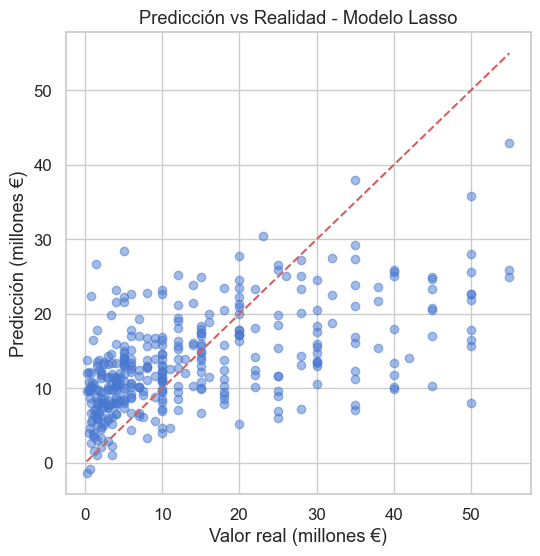

In [502]:
import matplotlib.pyplot as plt

# Usamos el mejor modelo (ejemplo: Lasso)
mejor_modelo = mejores_modelos["Lasso"]["Mejor modelo"]

y_pred = mejor_modelo.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # línea ideal
plt.xlabel("Valor real (millones €)")
plt.ylabel("Predicción (millones €)")
plt.title("Predicción vs Realidad - Modelo Lasso")
plt.show()


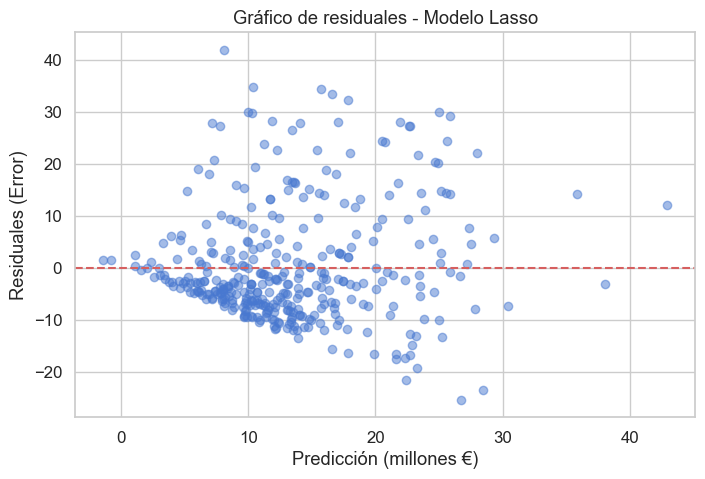

In [503]:
residuales = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuales, alpha=0.5)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel("Predicción (millones €)")
plt.ylabel("Residuales (Error)")
plt.title("Gráfico de residuales - Modelo Lasso")
plt.show()

Los dos gráficos anteriores permiten evaluar el desempeño y los supuestos del modelo de regresión lineal Lasso:

1. **Predicción vs Realidad:** El gráfico de dispersión muestra que existe una correlación positiva entre los valores predichos y los valores reales del valor de mercado de los jugadores, aunque la dispersión es considerable, especialmente para valores altos. Esto indica que el modelo logra capturar parte de la tendencia general, pero tiene limitaciones para predecir con precisión los valores extremos o atípicos.

2. **Gráfico de residuales:** El gráfico de residuales revela que los errores de predicción se distribuyen de manera relativamente simétrica alrededor de cero, aunque se observan algunos valores atípicos y una mayor dispersión para predicciones elevadas. Esto sugiere que el modelo no presenta un sesgo sistemático, pero la varianza de los errores aumenta para valores altos, lo que puede indicar cierta heterocedasticidad y la necesidad de explorar transformaciones adicionales o modelos más complejos.

En resumen, el modelo tiene un poder predictivo moderado y no muestra sesgos graves, pero existen oportunidades de mejora en la precisión, especialmente para los jugadores con mayor valor de mercado.


## 4.4 Interpretación y Reflexión
- **Discusión sobre los resultados:**
El modelo lineal con regularización logra capturar parcialmente la variabilidad del valor de mercado de los jugadores, con un R² cercano al 0.315. Esto significa que explica alrededor de un tercio de la variación, lo cual es un ajuste moderado y evidencia que existen factores adicionales que no están siendo contemplados en las variables disponibles. Al observar los coeficientes, métricas como goles, asistencias esperadas (xA), toques en zona ofensiva y edad tienden a tener un impacto relevante, lo que coincide con el contexto de negocio: jugadores con mejores estadísticas ofensivas y en edad óptima suelen tener mayor valoración en el mercado. Sin embargo, los gráficos de residuales muestran que los errores no son totalmente aleatorios, lo que indica que el modelo tiene limitaciones para capturar relaciones no lineales. En cuanto a la complejidad, no se evidencia un sobreajuste marcado ya que el desempeño entre entrenamiento y prueba es consistente, aunque sí se aprecia cierto subajuste, propio de un modelo lineal en un problema tan complejo.
- **Conclusiones y próximos pasos:**
El modelo lineal regularizado es una buena primera aproximación, ya que aporta interpretabilidad y permite entender qué variables influyen más en la valoración de los jugadores. No obstante, su capacidad predictiva es limitada para un mercado tan dinámico y multifactorial como el de fichajes.

# Paso 5: Pipeline de Predicción y Exportación (15%) (Estudiante 1)
## 5.1 Implementación del Pipeline (sklearn.pipeline)
Código de la construcción del pipeline paso a paso.


In [506]:
pipeline_final = Pipeline([
    ("scaler", StandardScaler()),
    ("modelo", Lasso(alpha=0.1))
])

## 5.2 Entrenamiento y Validación en Pipeline

In [508]:
# Entrenar el pipeline directamente
pipeline_final.fit(X_train, y_train)

# Predicciones
y_pred_pipeline = pipeline_final.predict(X_test)

# Evaluación
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred_pipeline))
mae = mean_absolute_error(y_test, y_pred_pipeline)
r2 = r2_score(y_test, y_pred_pipeline)

print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")


RMSE: 11.158
MAE: 8.377
R²: 0.315


## 5.3 Exportación del Pipeline a .joblib

In [509]:
# Exportar pipeline
dump(pipeline_final, "modelo_futalpes.joblib")


['modelo_futalpes.joblib']

# Paso 6: Supuestos de la Regresión (10%) (Estudiante 2)
## 6.1 Chequeos Gráficos de Supuestos
Residuos vs. predicciones: Gráfica e interpretación.
Normalidad de residuos: Histograma, QQ plot.
Homoscedasticidad: Gráfica con la interpretación.


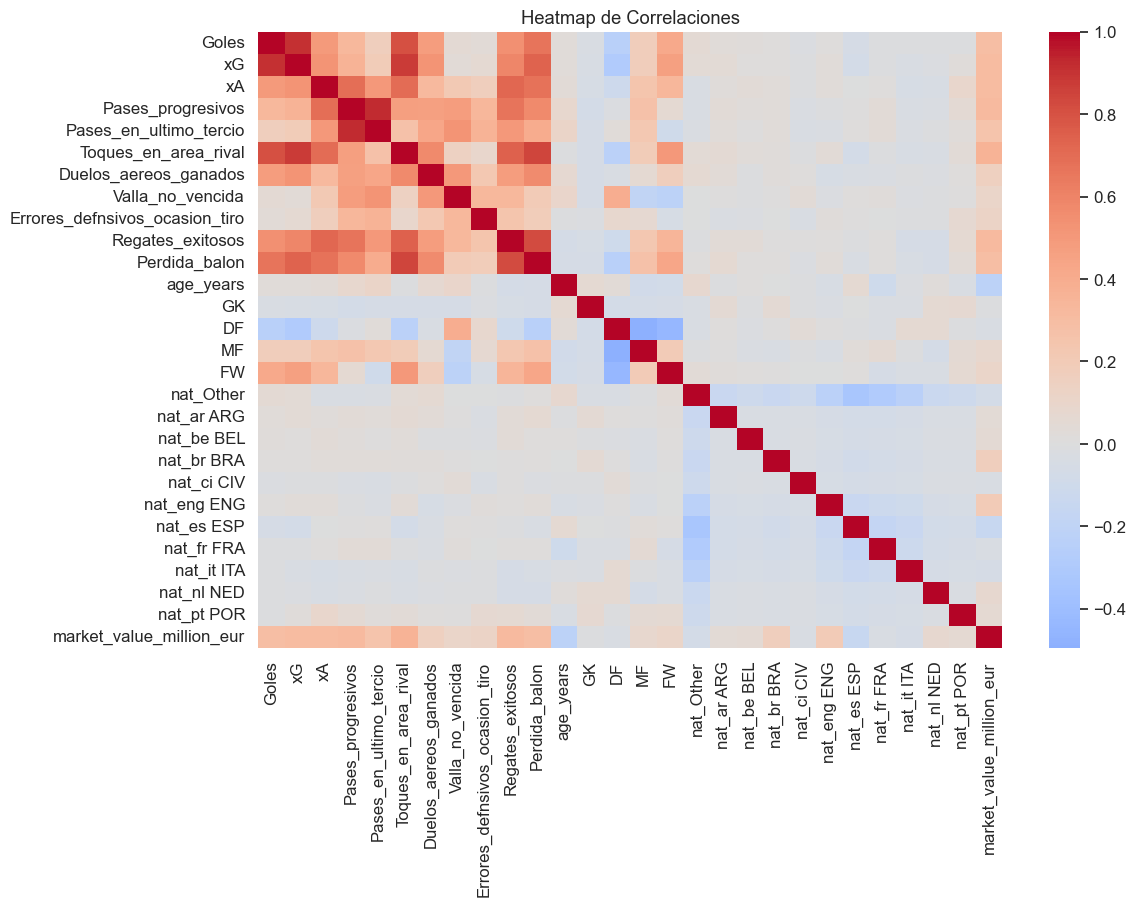

In [513]:
corr_matrix = df_filtrado.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False)
plt.title("Heatmap de Correlaciones")
plt.show()

## 6.2 Discusión sobre Cumplimiento de Supuestos
¿Se cumplen o no? Para cada supuesto, argumenta con evidencia.

# Paso 7: Transformaciones para Cumplir Supuestos + Interpretación (15%) (Estudiante 2)
## 7.1 Transformaciones Complementarias
Qué nuevas transformaciones hiciste: log, BoxCox, eliminar outliers...
Por qué elegiste cada una.
## 7.2 Nuevo Ajuste y Evaluación del Modelo
Repetición del modelado y nuevas métricas.
## 7.3 Interpretación de Coeficientes
Explica en lenguaje sencillo qué significa un aumento de 1 unidad en cada predictor (las más relevantes).

# Paso 8: Presentación para FutAlpes F.C (10%) (Estudiante 3)
## 8.1 Creación de Diapositivas
Agrega enlace o adjunta archivo PDF/PPT.
## 8.2 Resultados Cuantitativos y Cualitativos
Muestra los resultados clave del mejor modelo (métricas, insights de variables importantes, etc).
## 8.3 Visualizaciones
Incluye gráficos relevantes (participa el notebook y/o la presentación).
## 8.4 Recomendaciones
Recomendaciones fundamentadas para la empresa a partir de los resultados.

# Paso 9: CSV de Predicciones y Métrica Final (5%)
## 9.1 Archivo CSV con Predicciones
Genera y guarda predicciones sobre los datos de prueba.
Explica la estructura y formato del archivo.
## 9.2 Reporte del RMSE (y posición en el ranking si corresponde)
Presenta el RMSE final sobre el test set y explica su relevancia.